In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
u = 1
dm = np.log(2)/2
dp = np.log(2)/60
v = 0.8

In [8]:
def gene(y, t):
    dydt = np.zeros(2)
    dydt[0] = u - dm*y[0]
    dydt[1] = v*y[0] - dp*y[1]
    return dydt


In [9]:
def othergene(t, y):
    return gene(y, t)

In [12]:
t = np.linspace(0, 150, 20)
y = odeint(gene, [0,0], t)


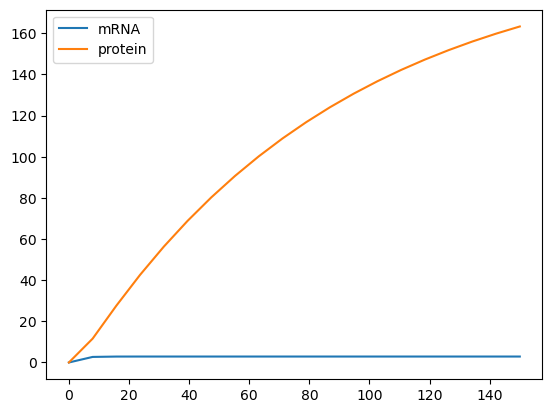

In [13]:
plt.figure()
plt.plot(t, y[:, 0], label = "mRNA")
plt.plot(t, y[:,1], label = "protein")
plt.legend()
plt.show()

In [15]:
sol = solve_ivp(othergene, t_span=[0, 150], y0 = [0,0], method = "LSODA")

In [16]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.162e-05 ...  1.343e+02  1.500e+02]
        y: [[ 0.000e+00  3.162e-05 ...  2.885e+00  2.885e+00]
            [ 0.000e+00  8.000e-10 ...  1.560e+02  1.632e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 100
     njev: 2
      nlu: 2

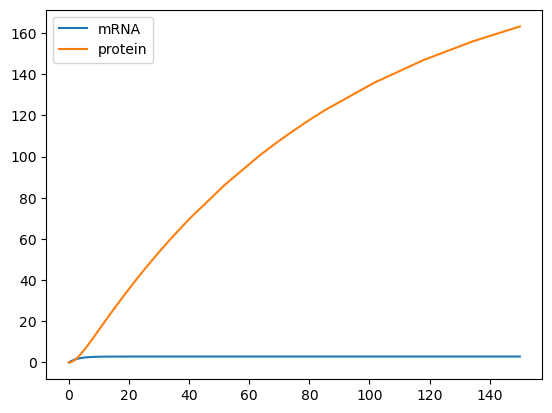

In [17]:
plt.figure()
plt.plot(sol.t, sol.y[0], label= 'mRNA')
plt.plot(sol.t, sol.y[1], label = "protein")
plt.legend()
plt.show()